<a href="https://colab.research.google.com/github/parviza9999/MSDS462/blob/main/MSDS462_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST** <br>
An MNIST-like dataset of 70,000 28x28 labeled fashion images

# Importing packages as needed

In [ ]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib as mpl  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score ,precision_recall_fscore_support #for accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten , Input , Dropout
from tensorflow.keras.datasets import mnist
#from plot_keras_history import plot_history

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
 import tensorflow as tf;
 print(tf.__version__);

2.7.0


# Get Data and Setup

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
from google.colab import drive
import gzip
#gdrive_dir_path = '/content/gdrive/My Drive/Colab Notebooks/data' # TODO: update path to your gdrive location
#os.chdir(gdrive_dir_path)
os.listdir()

['.config',
 'CNN_4.png',
 'CNN_2.png',
 'CNN_1.png',
 'gdrive',
 'DNN.png',
 'sample_data']

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print("The shape of x train and x test dataset :" , x_train.shape ,x_test.shape)
print("The shape of y train and y test dataset :" , y_train.shape ,y_test.shape)

The shape of x train and x test dataset : (60000, 28, 28) (10000, 28, 28)
The shape of y train and y test dataset : (60000,) (10000,)


In [ ]:
#Reviewing the max and min value in the train dataset
x_train.min(), x_train.max()

(0, 255)

In [ ]:
#Reviewing the datatype 
x_train.dtype , x_test.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
#Printing few of the observations for review
print("First ten labels training dataset:\n {}\n".format(y_train[0:10]))

First ten labels training dataset:
 [9 0 0 3 0 2 7 2 5 5]



0=T-shirt/top <br>
1=Trouser <br>
2=Pullover <br>
3=Dress <br>
4=Coat <br>
5=Sandal <br>
6=Shirt <br>
7=Sneaker <br>
8=Bag <br>
9=Ankle boot

# Missing value check

In [ ]:
#Checking if there is null in x_train or x_test
np.all(np.isnan(x_train)) , np.all(np.isnan(x_test))

(False, False)

No data is missing across all columns

# Plotting the Fashion MNIST images

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '6')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '7')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

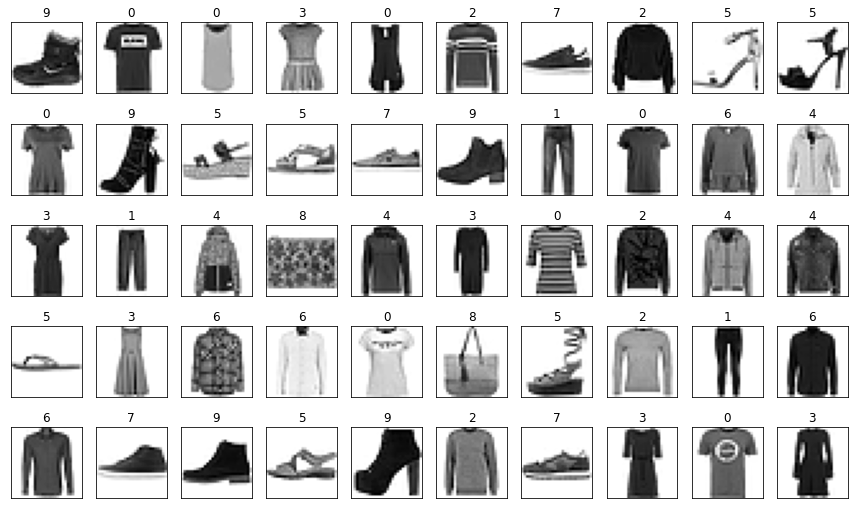

In [ ]:
fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap='binary')

# Reviewing the labels

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

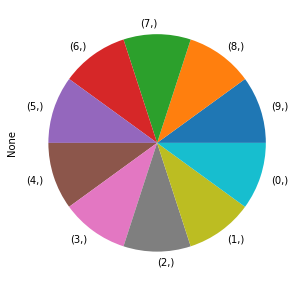

In [ ]:
#Understanding the frequency of labels for training y 
pd.DataFrame(y_train).value_counts()
pd.DataFrame(y_train).value_counts().plot(kind='pie', figsize=(5, 5) )

9    1000
8    1000
7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
1    1000
0    1000
dtype: int64

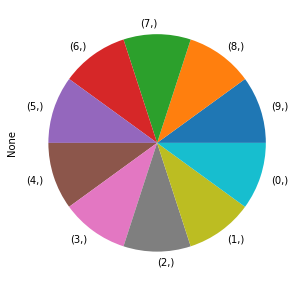

In [ ]:
#Understanding the frequency of labels for test y 
pd.DataFrame(y_test).value_counts()
pd.DataFrame(y_test).value_counts().plot(kind='pie', figsize=(5, 5) )

The products are equally distributed across the datasets

# Data Transformation
The image data cannot be fed directly into the model, thus we need to transform it

In [ ]:
#To flatten it into a 1D array the number of columns of a 28x28 pixel image would be 
print('image_vector_size: ', 28*28 )

image_vector_size:  784


In [ ]:
# Flattening the images to a 1 D array:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# Verifying the shape:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


Each element in an image is a pixel value where pixel values range from 0 to 255:

0 = White <br>
255 = Black

In [ ]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 4, 6, 7, 10, 12, 13, 15, 18, 23, 29, 35, 36, 40, 41, 44, 48, 52, 54, 55, 56, 57, 58, 61, 62, 64, 65, 66, 67, 69, 72, 73, 74, 75, 77, 80, 82, 88, 92, 98, 99, 102, 106, 107, 109, 115, 117, 119, 121, 122, 123, 127, 130, 134, 136, 141, 144, 145, 146, 150, 154, 155, 156, 159, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 255}


# Rescaling Train and Test samples

In [ ]:
# Normalize from [0:255] => [0.0:1.0]
x_train_norm = np.multiply(x_train_reshaped, 1.0 / 255.0) 
x_test_norm = np.multiply(x_test_reshaped, 1.0 / 255.0) 

In [ ]:
#Reviewing scaling 
x_train_norm.min() , x_train_norm.max()
x_test_norm.min() , x_test_norm.max() 

(0.0, 1.0)

(0.0, 1.0)

# Utility

In [ ]:
results = {}

In [ ]:
def plot_history(model):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,5))
    ax1.plot(model.history.history['val_accuracy'], label = 'validation')
    ax1.plot(model.history.history['accuracy'], label = 'train')
    ax1.grid()
    ax1.legend()
    ax2.plot(model.history.history['val_loss'], label = 'validation')
    ax2.plot(model.history.history['loss'], label = 'train')
    ax2.grid()
    ax2.legend()

In [ ]:
def plot_confusion_matrix(y_true,y_pred):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(5,5))
    matrix = confusion_matrix(y_true, y_pred)
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    plt.xlabel("Predicted Classes")
    plt.ylabel("Actual Classes")
    plt.show()

In [ ]:
import time
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_train_norm, y_train)
X_test, y_test = x_test_norm, y_test

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train ,num_classes = 10)
y_valid_encoded = to_categorical(y_val ,num_classes = 10)
y_test_encoded = to_categorical(y_test , num_classes = 10)

# Experiment 1: 2 layer DNN

In [ ]:
from tensorflow.keras import layers
import datetime
time_callback_1 = TimeHistory()
X_train_exp_1= X_train.copy().reshape(X_train.shape[0], 28,28)
X_val_exp_1 = X_val.copy().reshape(X_val.shape[0],28,28)

tf.keras.backend.clear_session()  # For easy reset of notebook state.

inputs = keras.Input(shape=(28,28, 1)) #H x W x Channels
x = layers.Flatten()(inputs)
x = layers.Dense(64 ,activation = 'relu')(x)
x = layers.Dense(32 ,activation = 'relu')(x)
outputs = layers.Dense(10 ,activation = 'softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='fashion_mnist_exp_1')

# For use with non-categorical labels
model.compile(optimizer='rmsprop',           
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#FITTING, and storing for plotting and call backs
history = model.fit(X_train_exp_1,y_train, validation_data = (X_val_exp_1,y_val), epochs=20, verbose = 1, callbacks = [time_callback_1])
results['exp1'] = history.history

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5518 - accuracy: 0.8038 - val_loss: 0.4694 - val_accuracy: 0.8241
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4034 - accuracy: 0.8534 - val_loss: 0.4572 - val_accuracy: 0.8398
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3639 - accuracy: 0.8675 - val_loss: 0.4725 - val_accuracy: 0.8435
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3433 - accuracy: 0.8754 - val_loss: 0.4102 - val_accuracy: 0.8600
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3286 - accuracy: 0.8824 - val_loss: 0.3660 - val_accuracy: 0.8724
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3196 - accuracy: 0.8837 - val_loss: 0.3562 - val_accuracy: 0.8777
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3142 - accuracy: 0.8879 - val_loss: 0.3921 - val_accuracy:

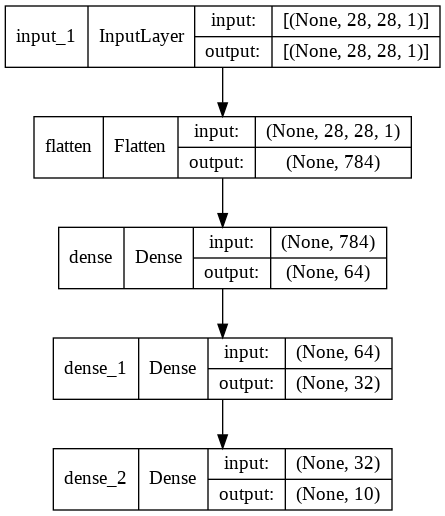

In [ ]:
keras.utils.plot_model(model, 'DNN.png', show_shapes=True)

In [ ]:
model.summary()

Model: "fashion_mnist_exp_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


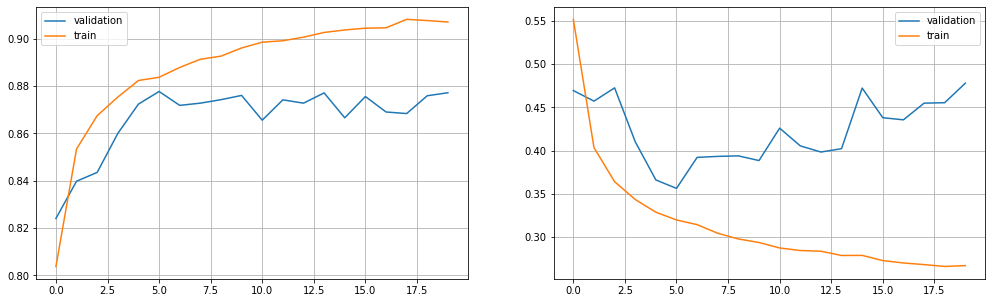

In [ ]:
plot_history(model)

In [ ]:
exp1_test_preds = model.predict(X_test.copy().reshape(X_test.shape[0],28,28))
exp1_val_preds = model.predict(X_val.copy().reshape(X_val.shape[0],28,28))

Text(0.5, 1.0, '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0.23 0.   0.25 0.   0.01 0.   0.06 0.   0.44 0.  ]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0.48 0.   0.   0.38 0.   0.   0.13 0.   0.   0.  ]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '[0.   0.   0.   0.   0.   0.   0.   0.28 0.   0.72]')

(-0.5, 27.5, 27.5, -0.5)

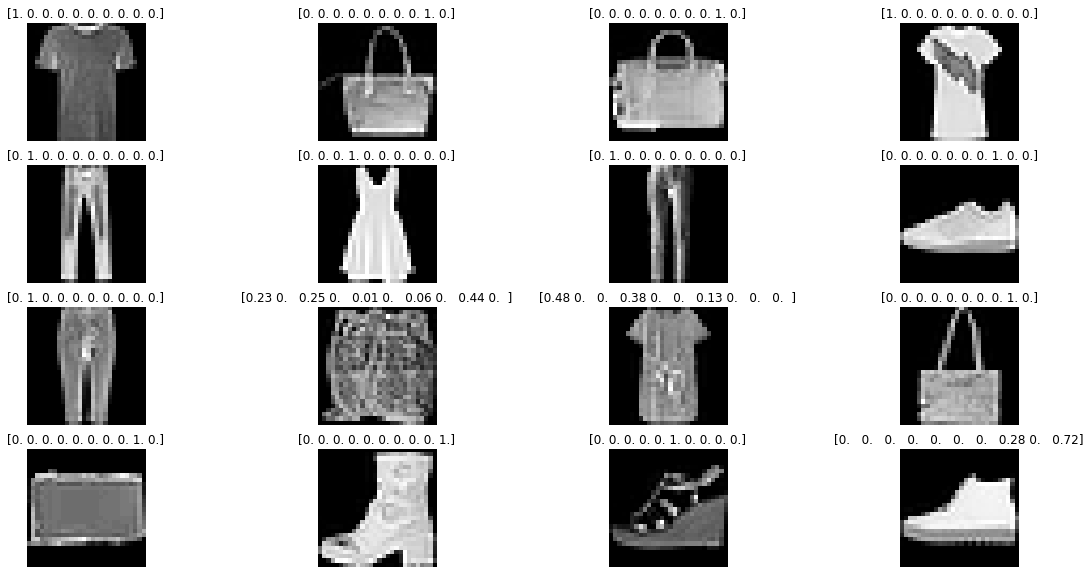

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize  = (20,10))
for i,ax in enumerate(axes.flatten()):
  ax.imshow(X_val[i].reshape(28,28), cmap = 'gray')
  ax.set_title(str(exp1_val_preds[i].round(2)))
  ax.axis('off');

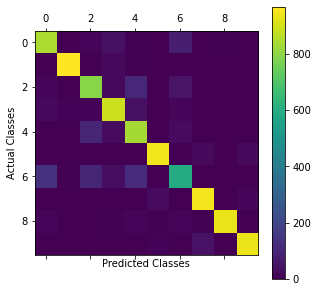

In [ ]:
plot_confusion_matrix(y_test, exp1_test_preds.argmax(axis = 1));

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = model.predict(X_test.reshape(X_test.shape[0], 28,28), batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print("Overall test Accuuracy Score: ", accuracy_score(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

157/157 [==============================] - 0s 2ms/step
Overall test Accuuracy Score:  0.8709
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.98      0.97      0.97      1000
           2       0.78      0.80      0.79      1000
           3       0.85      0.89      0.87      1000
           4       0.74      0.84      0.78      1000
           5       0.95      0.95      0.95      1000
           6       0.75      0.59      0.66      1000
           7       0.92      0.95      0.94      1000
           8       0.99      0.94      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Experiment 2: 1 layer CNN 

In [ ]:
from tensorflow.keras import layers
import datetime
time_callback_2 = TimeHistory()
X_train_exp_2 = X_train.copy().reshape(X_train.shape[0], 28,28)
X_val_exp_2 = X_val.copy().reshape(X_val.shape[0],28,28)

tf.keras.backend.clear_session()  # For easy reset of notebook state.

inputs = keras.Input(shape=(28,28, 1)) #H x W x Channels
x = layers.Conv2D(filters = 16, kernel_size = (2,2), strides = (1,1), activation = ('relu'), padding = 'same')(inputs)
x = layers.MaxPooling2D(1,1)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10 ,activation = 'softmax')(x)

model_2 = keras.Model(inputs=inputs, outputs=outputs, name='fashion_mnist_exp_2')

# For use with non-categorical labels
model_2.compile(optimizer='rmsprop',           
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#FITTING, and storing for plotting and call backs
history = model_2.fit(X_train_exp_3,y_train, validation_data = (X_val_exp_2,y_val), epochs=20, verbose = 1, callbacks = [time_callback_2])
results['exp2'] = history.history

Epoch 1/20
1407/1407 [==============================] - 25s 17ms/step - loss: 2.3066 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.0903
Epoch 2/20
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2946 - accuracy: 0.1237 - val_loss: 2.3053 - val_accuracy: 0.0963
Epoch 3/20
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2690 - accuracy: 0.1503 - val_loss: 2.3225 - val_accuracy: 0.0933
Epoch 4/20
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2385 - accuracy: 0.1710 - val_loss: 2.3626 - val_accuracy: 0.0828
Epoch 5/20
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2107 - accuracy: 0.1859 - val_loss: 2.3819 - val_accuracy: 0.0883
Epoch 6/20
1407/1407 [==============================] - 24s 17ms/step - loss: 2.1849 - accuracy: 0.2018 - val_loss: 2.3759 - val_accuracy: 0.1021
Epoch 7/20
1407/1407 [==============================] - 24s 17ms/step - loss: 2.1620 - accuracy: 0.2113 - val_loss: 2.3987 -

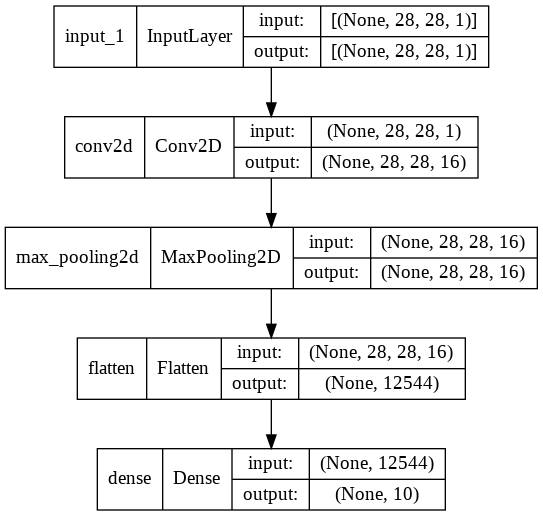

In [ ]:
keras.utils.plot_model(model_2, 'CNN_1.png', show_shapes=True)

In [ ]:
model_2.summary()

Model: "fashion_mnist_exp_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                125450    
                                                                 
Total params: 125,530
Trainable params: 125,530
Non-trainable params: 0
_________________________________________

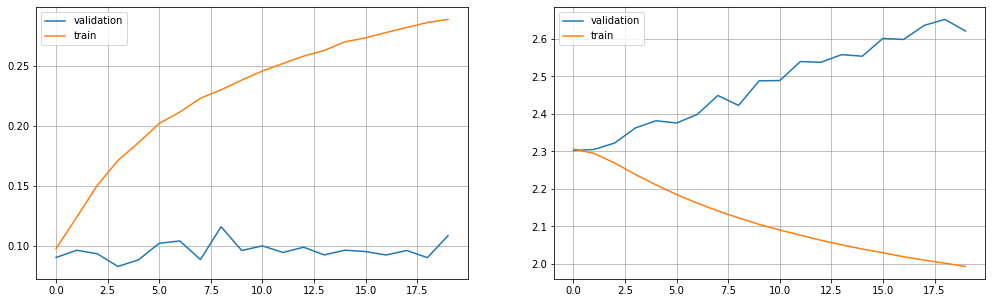

In [ ]:
plot_history(model_2)

In [ ]:
exp2_test_preds = model_2.predict(X_test.copy().reshape(X_test.shape[0],28,28))
exp2_val_preds = model_2.predict(X_val.copy().reshape(X_val.shape[0],28,28))

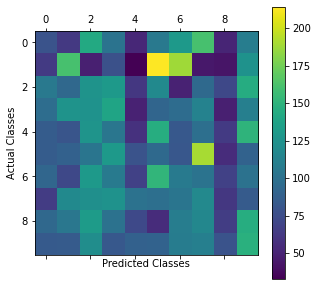

In [ ]:
plot_confusion_matrix(y_test, exp2_test_preds.argmax(axis = 1));

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = model_2.predict(X_test.reshape(X_test.shape[0], 28,28), batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print("Overall test Accuuracy Score: ", accuracy_score(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

157/157 [==============================] - 2s 10ms/step
Overall test Accuuracy Score:  0.1098
              precision    recall  f1-score   support

           0       0.09      0.08      0.09      1000
           1       0.16      0.16      0.16      1000
           2       0.11      0.13      0.12      1000
           3       0.13      0.14      0.13      1000
           4       0.09      0.06      0.07      1000
           5       0.08      0.10      0.09      1000
           6       0.10      0.11      0.10      1000
           7       0.10      0.12      0.11      1000
           8       0.11      0.07      0.08      1000
           9       0.12      0.15      0.13      1000

    accuracy                           0.11     10000
   macro avg       0.11      0.11      0.11     10000
weighted avg       0.11      0.11      0.11     10000



# Experiment 3 : 2 layer CNN

In [ ]:
from tensorflow.keras import layers
import datetime
time_callback_3 = TimeHistory()
X_train_exp_3 = X_train.copy().reshape(X_train.shape[0], 28,28)
X_val_exp_3 = X_val.copy().reshape(X_val.shape[0],28,28)

tf.keras.backend.clear_session()  # For easy reset of notebook state.

inputs = keras.Input(shape=(28,28, 1)) #H x W x Channels
x = layers.Conv2D(filters = 8, kernel_size = (1,1), strides = (1,1), activation = ('relu'), padding = 'same')(inputs)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(filters = 8, kernel_size = (2,2), strides = (1,1), activation = ('relu'), padding = 'same')(x)
x = layers.MaxPooling2D(1,1)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10 ,activation = 'softmax')(x)

model_3 = keras.Model(inputs=inputs, outputs=outputs, name='fashion_mnist_exp_3')

# For use with non-categorical labels
model_3.compile(optimizer='rmsprop',           
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#FITTING, and storing for plotting and call backs
history = model_3.fit(X_train_exp_3,y_train, validation_data = (X_val_exp_3,y_val), epochs=20, verbose = 1, callbacks = [time_callback_3])
results['exp3'] = history.history

Epoch 1/20
1407/1407 [==============================] - 16s 11ms/step - loss: 0.6144 - accuracy: 0.7808 - val_loss: 0.5365 - val_accuracy: 0.8019
Epoch 2/20
1407/1407 [==============================] - 16s 12ms/step - loss: 0.4655 - accuracy: 0.8340 - val_loss: 0.4635 - val_accuracy: 0.8353
Epoch 3/20
1407/1407 [==============================] - 16s 11ms/step - loss: 0.4216 - accuracy: 0.8492 - val_loss: 0.4355 - val_accuracy: 0.8446
Epoch 4/20
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3972 - accuracy: 0.8595 - val_loss: 0.4060 - val_accuracy: 0.8573
Epoch 5/20
1407/1407 [==============================] - 16s 11ms/step - loss: 0.3807 - accuracy: 0.8670 - val_loss: 0.3960 - val_accuracy: 0.8620
Epoch 6/20
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3699 - accuracy: 0.8712 - val_loss: 0.3982 - val_accuracy: 0.8590
Epoch 7/20
1407/1407 [==============================] - 16s 11ms/step - loss: 0.3616 - accuracy: 0.8738 - val_loss: 0.3834 -

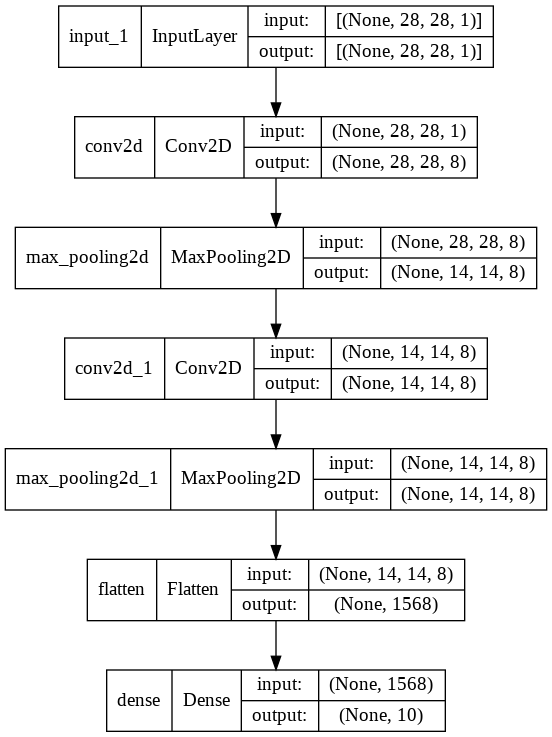

In [ ]:
keras.utils.plot_model(model_3, 'CNN_2.png', show_shapes=True)

In [ ]:
model_3.summary()

Model: "fashion_mnist_exp_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         16        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         264       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)      

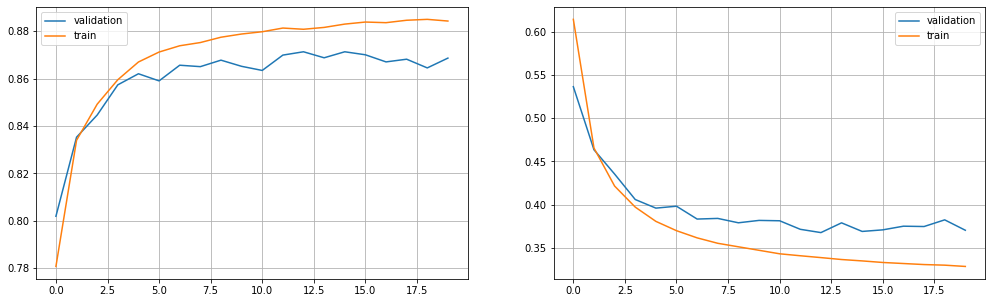

In [ ]:
plot_history(model_3)

In [ ]:
exp3_test_preds = model_3.predict(X_test.copy().reshape(X_test.shape[0],28,28))
exp3_val_preds = model_3.predict(X_val.copy().reshape(X_val.shape[0],28,28))

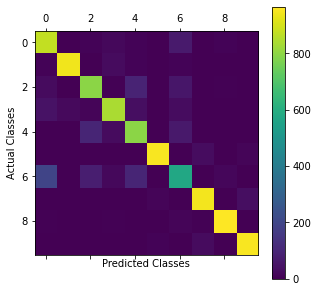

In [ ]:
plot_confusion_matrix(y_test, exp3_test_preds.argmax(axis = 1));

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = model_3.predict(X_test.reshape(X_test.shape[0], 28,28), batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print("Overall test Accuracy Score: ", accuracy_score(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

157/157 [==============================] - 1s 6ms/step
Overall test Accuracy Score:  0.8663
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1000
           1       0.96      0.94      0.95      1000
           2       0.80      0.80      0.80      1000
           3       0.88      0.84      0.86      1000
           4       0.76      0.80      0.78      1000
           5       0.97      0.95      0.96      1000
           6       0.70      0.58      0.63      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Experiment 4: 4 layer CNN

In [ ]:
from tensorflow.keras import layers
import datetime
time_callback_4 = TimeHistory()
X_train_exp_4 = X_train.copy().reshape(X_train.shape[0], 28,28)
X_val_exp_4 = X_val.copy().reshape(X_val.shape[0],28,28)

tf.keras.backend.clear_session()  # For easy reset of notebook state.

inputs = keras.Input(shape=(28,28, 1)) #H x W x Channels
x = layers.Conv2D(filters = 56, kernel_size = (3,3), strides = (2,2), activation = ('relu'), padding = 'same')(inputs)
x = layers.MaxPooling2D(1,1)(x)

x = layers.Conv2D(filters = 96, kernel_size = (3,3), strides = (1,1), activation = ('relu'), padding = 'same')(x)
x = layers.MaxPooling2D(1,1)(x)

x = layers.Conv2D(filters = 128, kernel_size = (2,2), strides = (1,1), activation = ('relu'), padding = 'same')(x)
x = layers.MaxPooling2D(1,1)(x)

x = layers.Conv2D(filters = 128, kernel_size = (2,2), strides = (1,1), activation = ('relu'), padding = 'same')(x)
x = layers.AveragePooling2D(2,2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(10 ,activation = 'softmax')(x)

model_4 = keras.Model(inputs=inputs, outputs=outputs, name='fashion_mnist_exp_4')

# For use with non-categorical labels
model_4.compile(optimizer='rmsprop',           
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#FITTING, and storing for plotting and call backs
history = model_4.fit(X_train_exp_4,y_train, validation_data = (X_val_exp_4,y_val), epochs=20,  verbose = 1, callbacks = [time_callback_4])
results['exp4'] = history.history

Epoch 1/20
1407/1407 [==============================] - 274s 194ms/step - loss: 0.4384 - accuracy: 0.8415 - val_loss: 0.3199 - val_accuracy: 0.8875
Epoch 2/20
1407/1407 [==============================] - 272s 194ms/step - loss: 0.2848 - accuracy: 0.8984 - val_loss: 0.3027 - val_accuracy: 0.8949
Epoch 3/20
1407/1407 [==============================] - 272s 194ms/step - loss: 0.2475 - accuracy: 0.9121 - val_loss: 0.2735 - val_accuracy: 0.9019
Epoch 4/20
1407/1407 [==============================] - 272s 193ms/step - loss: 0.2238 - accuracy: 0.9216 - val_loss: 0.2680 - val_accuracy: 0.9085
Epoch 5/20
1407/1407 [==============================] - 272s 193ms/step - loss: 0.2024 - accuracy: 0.9285 - val_loss: 0.2952 - val_accuracy: 0.9069
Epoch 6/20
1407/1407 [==============================] - 273s 194ms/step - loss: 0.1880 - accuracy: 0.9331 - val_loss: 0.2747 - val_accuracy: 0.9044
Epoch 7/20
1407/1407 [==============================] - 274s 195ms/step - loss: 0.1734 - accuracy: 0.9387 - val_

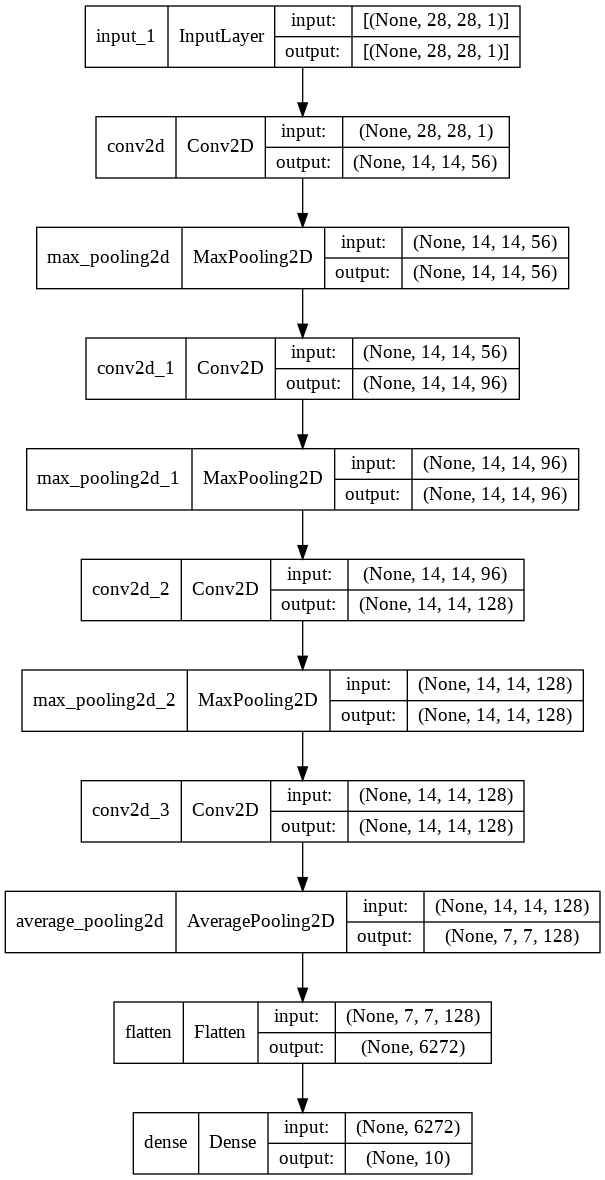

In [ ]:
keras.utils.plot_model(model_4, 'CNN_4.png', show_shapes=True)

In [ ]:
model_4.summary()

Model: "fashion_mnist_exp_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 56)        560       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 56)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 96)        48480     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 96)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128

In [ ]:
exp4_test_preds = model_4.predict(X_test.copy().reshape(X_test.shape[0],28,28))
exp4_val_preds = model_4.predict(X_val.copy().reshape(X_val.shape[0],28,28))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = model_4.predict(X_test.reshape(X_test.shape[0], 28,28), batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print("Overall test Accuracy Score: ", accuracy_score(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

157/157 [==============================] - 13s 86ms/step
Overall test Accuracy Score:  0.912
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.85      0.90      0.87      1000
           3       0.93      0.90      0.91      1000
           4       0.84      0.89      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.68      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



[5.2225182056427,
 4.48299503326416,
 4.330639839172363,
 4.31791877746582,
 4.084426403045654,
 4.407408237457275,
 4.069575309753418,
 4.071123838424683,
 4.078709840774536,
 4.183614253997803,
 4.1698079109191895,
 4.272640943527222,
 4.464002847671509,
 4.0653746128082275,
 4.205553293228149,
 4.155398368835449,
 4.150553226470947,
 4.135494232177734,
 4.157462120056152,
 4.28178071975708]

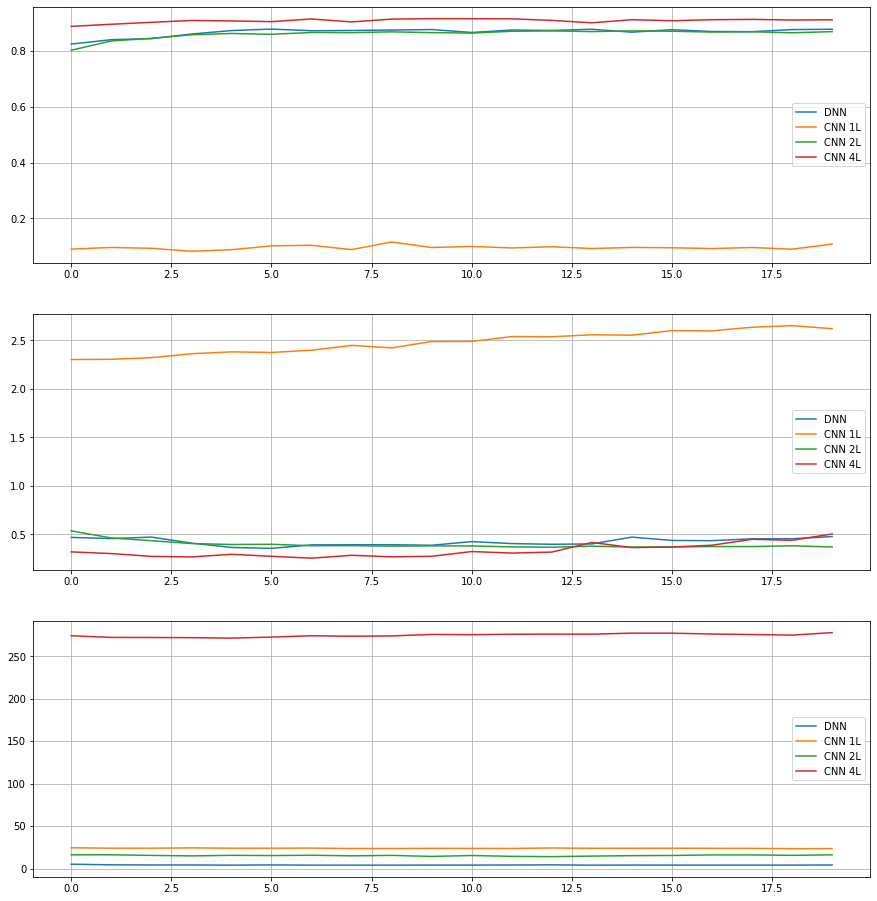

In [ ]:
def plot_accuracies(ax):
  ax.plot(results['exp1']['val_accuracy'], label = "DNN")
  ax.plot(results['exp2']['val_accuracy'], label = "CNN 1L")
  ax.plot(results['exp3']['val_accuracy'], label = "CNN 2L")
  ax.plot(results['exp4']['val_accuracy'], label = "CNN 4L")
  ax.grid();
  ax.legend();



def plot_losses(ax):
  ax.plot(results['exp1']['val_loss'], label = "DNN")
  ax.plot(results['exp2']['val_loss'], label = "CNN 1L")
  ax.plot(results['exp3']['val_loss'], label = "CNN 2L")
  ax.plot(results['exp4']['val_loss'], label = "CNN 4L")
  ax.grid();
  ax.legend();


def plot_times(ax):
  ax.plot(time_callback_1.times, label = "DNN")
  ax.plot(time_callback_2.times, label = "CNN 1L")
  ax.plot(time_callback_3.times, label = "CNN 2L")
  ax.plot(time_callback_4.times, label = "CNN 4L")
  ax.grid();
  ax.legend();


time_callback_1.times
fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize = (15,16))
plot_accuracies(ax1)
plot_losses(ax2)
plot_times(ax3)

In [ ]:
df = pd.concat([
           pd.DataFrame(results['exp1']),
           pd.DataFrame(results['exp2']),
           pd.DataFrame(results['exp3']),
           pd.DataFrame(results['exp4']),
]) 

In [ ]:
df['epochs'] = [*range(1,21)]*4

In [ ]:
df['time'] =  pd.concat(map(pd.DataFrame,[time_callback_1.times,
  time_callback_2.times,
  time_callback_3.times,
  time_callback_4.times,]), axis = 1).melt()['value'].values


e = 20
l = ['Exp1', 'Exp2', 'Exp3', 'Exp4']
df['model'] = [ele for ele in l for i in range(e)]

In [ ]:
df.to_csv('time.csv')